In [1]:
import pandas as pd

data = pd.read_csv("blogs.csv")

In [2]:
print(data.head())


                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [3]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [4]:
print(data['Labels'].value_counts())

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


In [77]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
# Preprocess text data
def preprocess_text(text):
    """Preprocesses a single string or a list of lists."""
    if isinstance(text, list):
        # Flatten nested lists up to a maximum depth
        flattened_text = [
            preprocess_text(item) if isinstance(item, list) else item
            for item in text
        ]
        return flattened_text  
    else:
        # Apply standard preprocessing to individual strings
        text = text.lower()
        text = re.sub(r"[^\w\s]", " ", text)  # Remove non-alphanumeric characters
        text = nltk.word_tokenize(text)
        text = [stemmer.stem(word) for word in text if word not in stop_words]
        return text

# Assuming your data is a DataFrame with a 'Data' column containing text data
data['Data'] = data['Data'].apply(preprocess_text)

# Ensure the 'Data' column contains individual strings
data['Data'] = data['Data'].astype(str)  # Convert to string if necessary


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Data'])
y = data['Labels']

In [66]:
print(data['Data'].head())

0    ['path', 'cantaloup', 'srv', 'cs', 'cmu', 'edu...
1    ['newsgroup', 'alt', 'ath', 'path', 'cantaloup...
2    ['path', 'cantaloup', 'srv', 'cs', 'cmu', 'edu...
3    ['path', 'cantaloup', 'srv', 'cs', 'cmu', 'edu...
4    ['xref', 'cantaloup', 'srv', 'cs', 'cmu', 'edu...
Name: Data, dtype: object


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [68]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [69]:
y_pred = nb_classifier.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7825
Precision: 0.807353908971081
Recall: 0.7825
F1-score: 0.7687194574052459


In [70]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [71]:
# Print classification report
report = classification_report(y_test, y_pred)
print(report)


                          precision    recall  f1-score   support

             alt.atheism       0.58      0.83      0.68        18
           comp.graphics       0.67      0.78      0.72        18
 comp.os.ms-windows.misc       0.71      1.00      0.83        22
comp.sys.ibm.pc.hardware       0.69      0.80      0.74        25
   comp.sys.mac.hardware       0.88      0.67      0.76        21
          comp.windows.x       1.00      0.24      0.39        25
            misc.forsale       0.72      0.72      0.72        18
               rec.autos       0.77      0.94      0.85        18
         rec.motorcycles       0.87      0.81      0.84        16
      rec.sport.baseball       0.89      0.89      0.89        18
        rec.sport.hockey       0.71      1.00      0.83        15
               sci.crypt       0.73      1.00      0.84        19
         sci.electronics       0.85      0.69      0.76        16
                 sci.med       0.88      0.88      0.88        17
         

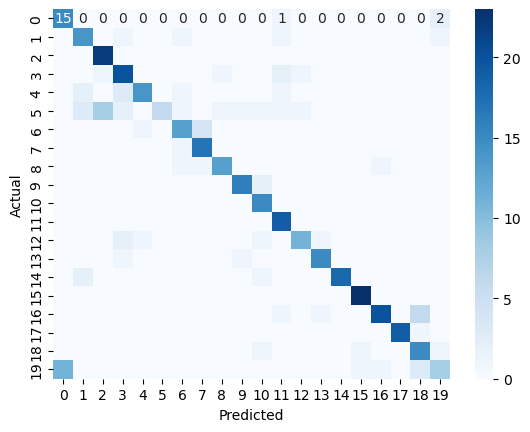

In [72]:
# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [73]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [74]:
# Sentiment analysis
from textblob import TextBlob
data['Sentiment'] = data['Data'].apply(lambda text: TextBlob(text).sentiment.polarity)


In [75]:
def categorize_sentiment(sentiment):
  if sentiment > 0:
    return 'Positive'
  elif sentiment < 0:
    return 'Negative'
  else:
    return 'Neutral'

data['Sentiment Category'] = data['Sentiment'].apply(categorize_sentiment)


In [76]:
# Examine sentiment distribution
print(data['Sentiment Category'].value_counts())

Sentiment Category
Positive    1250
Negative     746
Neutral        4
Name: count, dtype: int64
